## Sentiment Analysis of Reviews of products, movies, and restaurants

In [12]:
#The attributes of the dataset are text sentences, extracted from reviews of products, movies, and restaurants
#https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences


# The dataset was downloaded from UCI website.

# The dataset was retrieved from from three different websites/fields:

# imdb.com
# amazon.com
# yelp.com

# For each website, there exist 500 positive and 500 negative sentences. 
# Those data was selected randomly from larger datasets of reviews. 
# Sentences that have a clearly positive or negative connotaton were selected,
# the goal was for no neutral sentences to be selected.

In [155]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')


In [104]:
amazon_review = pd.read_csv('C:/Users/USER/Downloads/Data Science/Job Applications/Kemi/sentiment+labelled+sentences/amazon_cells_labelled.csv')
yelp_review = pd.read_csv('C:/Users/USER/Downloads/Data Science/Job Applications/Kemi/sentiment+labelled+sentences/yelp_labelled.csv')
imdb_review = pd.read_csv('C:/Users/USER/Downloads/Data Science/Job Applications/Kemi/sentiment+labelled+sentences/imdb_labelled.csv')

review_df = pd.concat([amazon_review, yelp_review, imdb_review])
review_df.head()

,text of tweet,polarity of tweet
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [105]:
review_df.count()

text of tweet        3000
polarity of tweet    3000
dtype: int64

In [106]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text of tweet      3000 non-null   object
 1   polarity of tweet  3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


In [107]:
review_df.isnull().sum()

text of tweet        0
polarity of tweet    0
dtype: int64

In [108]:
#Simplifying the names of columns
review_df.columns = ['text', 'sentiment']

In [109]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3000 non-null   object
 1   sentiment  3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


In [110]:
review_df['sentiment'].value_counts()

0    1500
1    1500
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

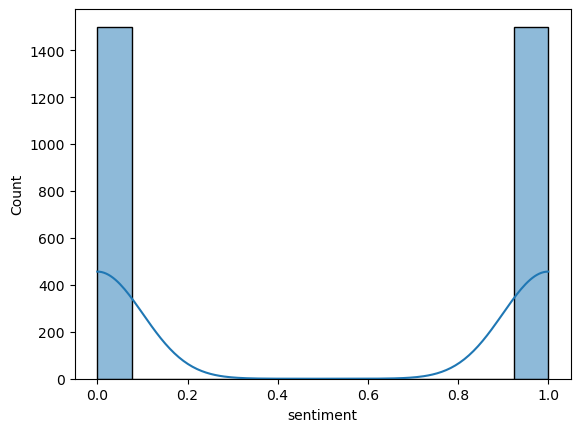

In [111]:
sns.histplot(review_df['sentiment'], kde=True)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

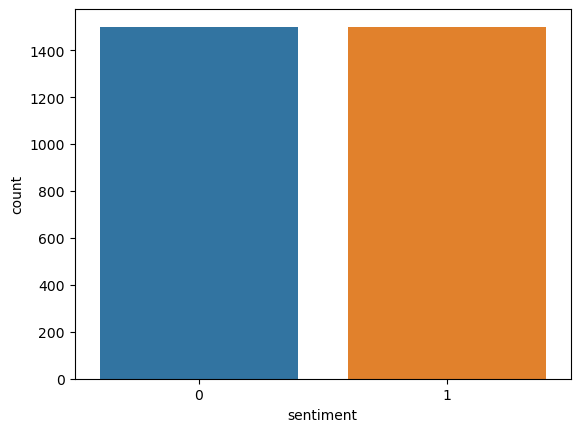

In [112]:
sns.countplot(x=review_df['sentiment'])

In [113]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = text.replace(r"http\S+", "")
    text = text.replace(r"https\S+", "")
    text = text.replace(r"http", "")
    text = text.replace(r"https", "")
    text = text.strip(' ')
    return text

def clean_text2(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    sentence = text.replace(r"http\S+", "")
    sentence = sentence.replace(r"https\S+", "")
    sentence = sentence.replace(r"http", "")
    sentence = sentence.replace(r"https", "")
    tokens = re.split('\W+', sentence)
    text = [word for word in tokens if word not in stopwords]
    text = [word for word in text if word.isalpha()]
    #text = " ".join(text)
    return text

In [115]:
review_df['WC_text'] = review_df['text'].map(lambda x : clean_text2(x))
review_df['clean_text'] = review_df['text'].map(lambda x : clean_text(x))

In [116]:
review_df

,text,sentiment,WC_text,clean_text
0,So there is no way for me to plug it in here i...,0,"[way, plug, us, unless, go, converter]",so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,"[good, case, excellent, value]",good case excellent value
2,Great for the jawbone.,1,"[great, jawbone]",great for the jawbone
3,Tied to charger for conversations lasting more...,0,"[tied, charger, conversations, lasting, minute...",tied to charger for conversations lasting more...
4,The mic is great.,1,"[mic, great]",the mic is great
...,...,...,...,...
995,I just got bored watching Jessice Lange take h...,0,"[got, bored, watching, jessice, lange, take, c...",i just got bored watching jessice lange take h...
996,"Unfortunately, any virtue in this film's produ...",0,"[unfortunately, virtue, films, production, wor...",unfortunately any virtue in this film producti...
997,"In a word, it is embarrassing.",0,"[word, embarrassing]",in a word it is embarrassing
998,Exceptionally bad!,0,"[exceptionally, bad]",exceptionally bad


In [117]:
positive = review_df[review_df['sentiment'] == 1]
positive_list = positive['WC_text'].tolist()
negative = review_df[review_df['sentiment'] == 0]
negative_list = negative['WC_text'].tolist()

In [118]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

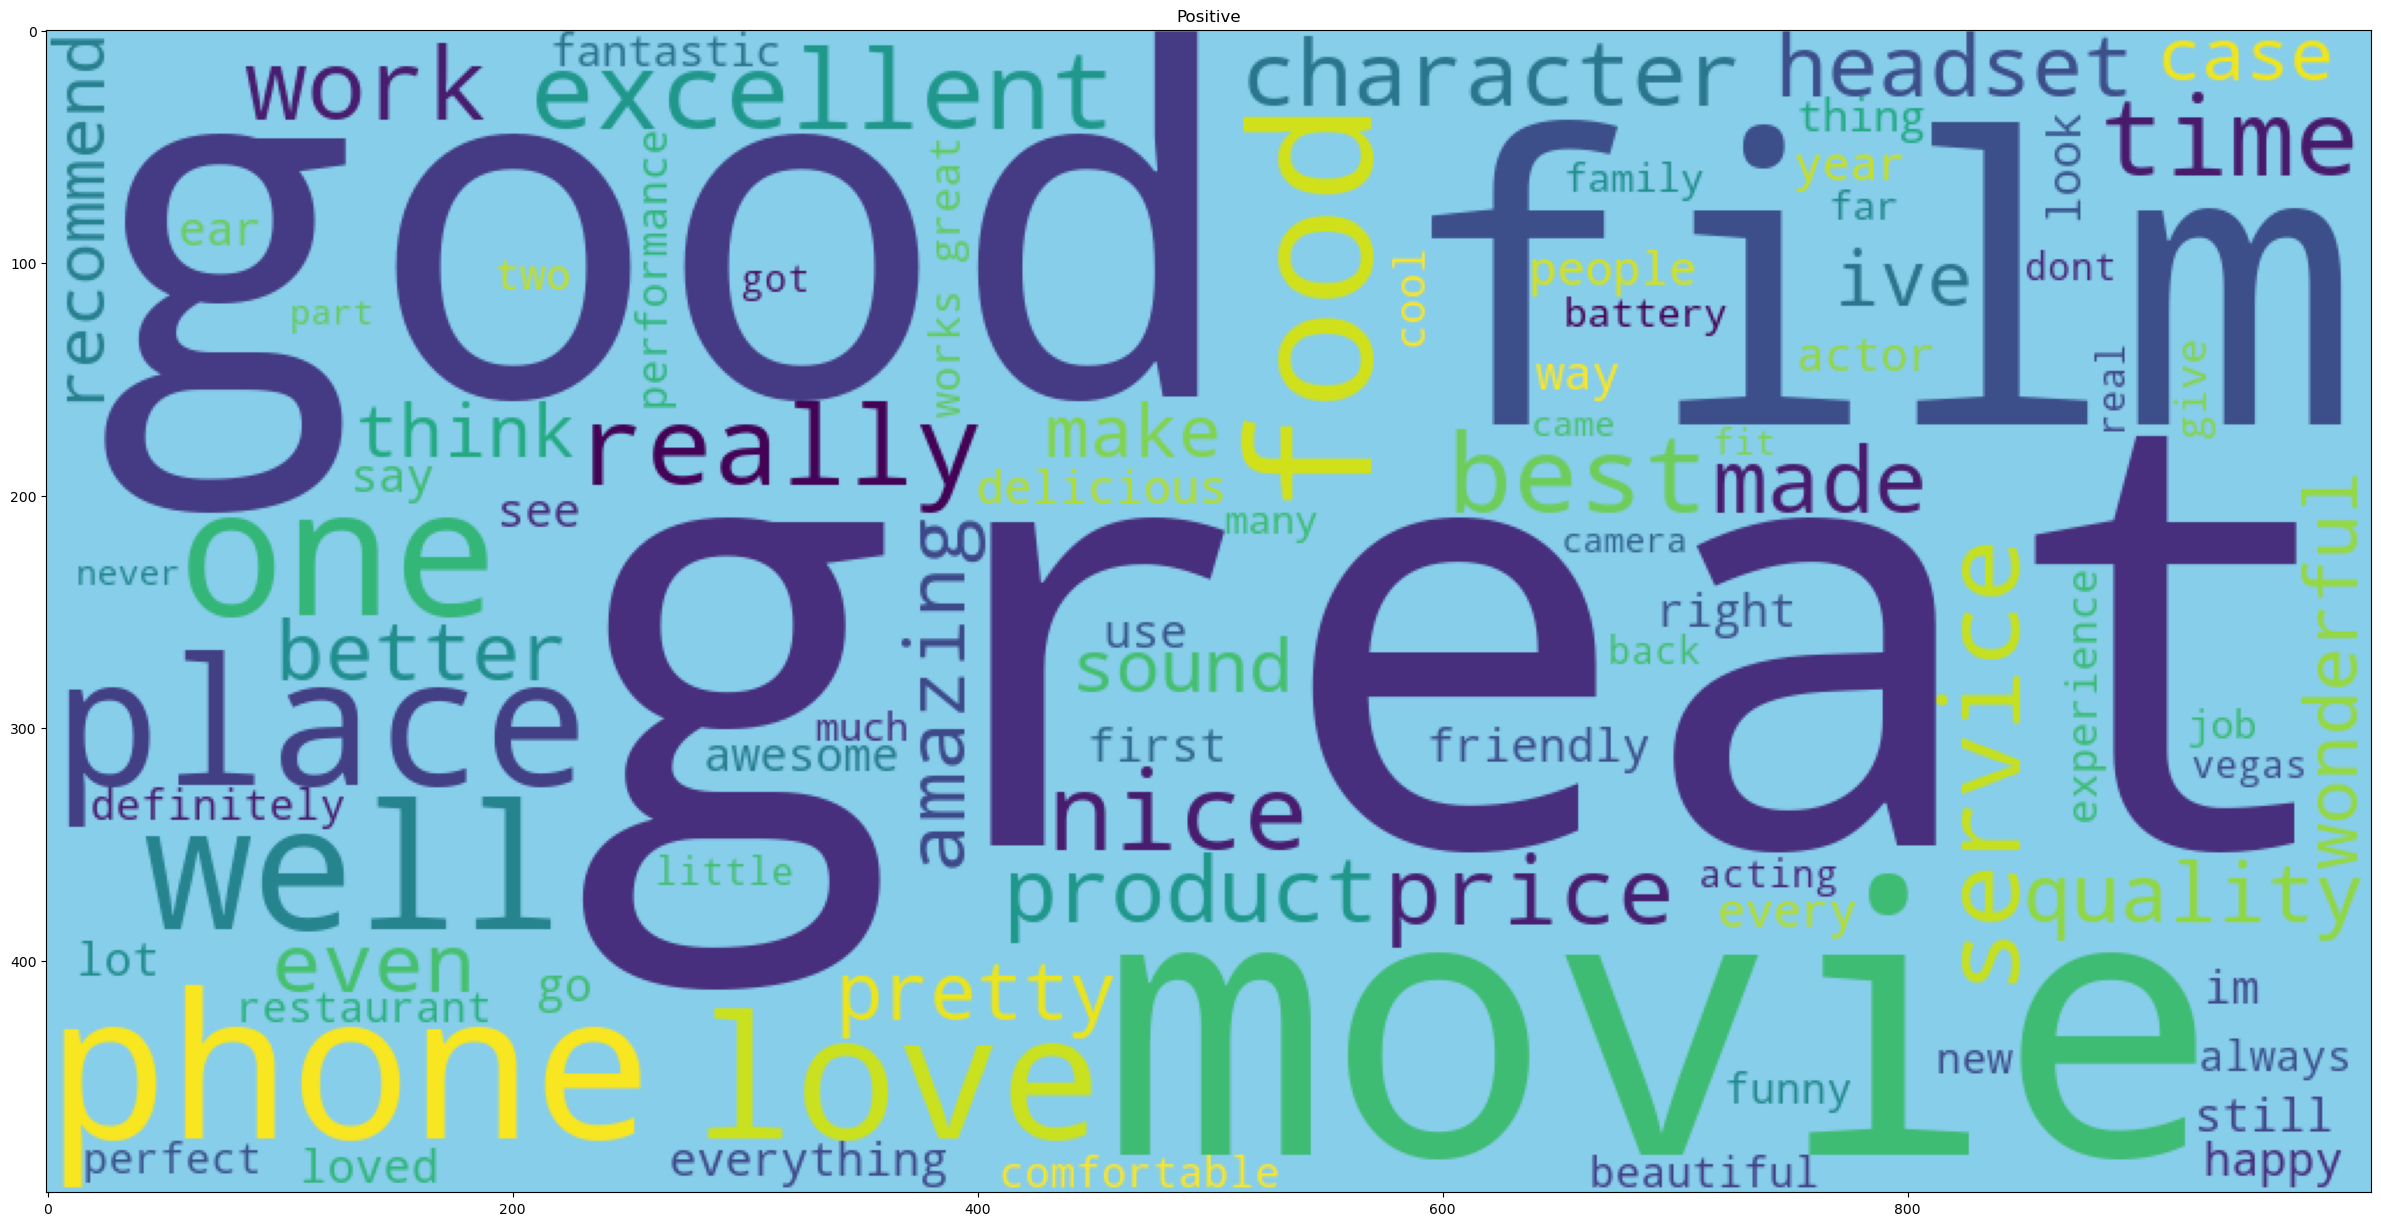

In [119]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

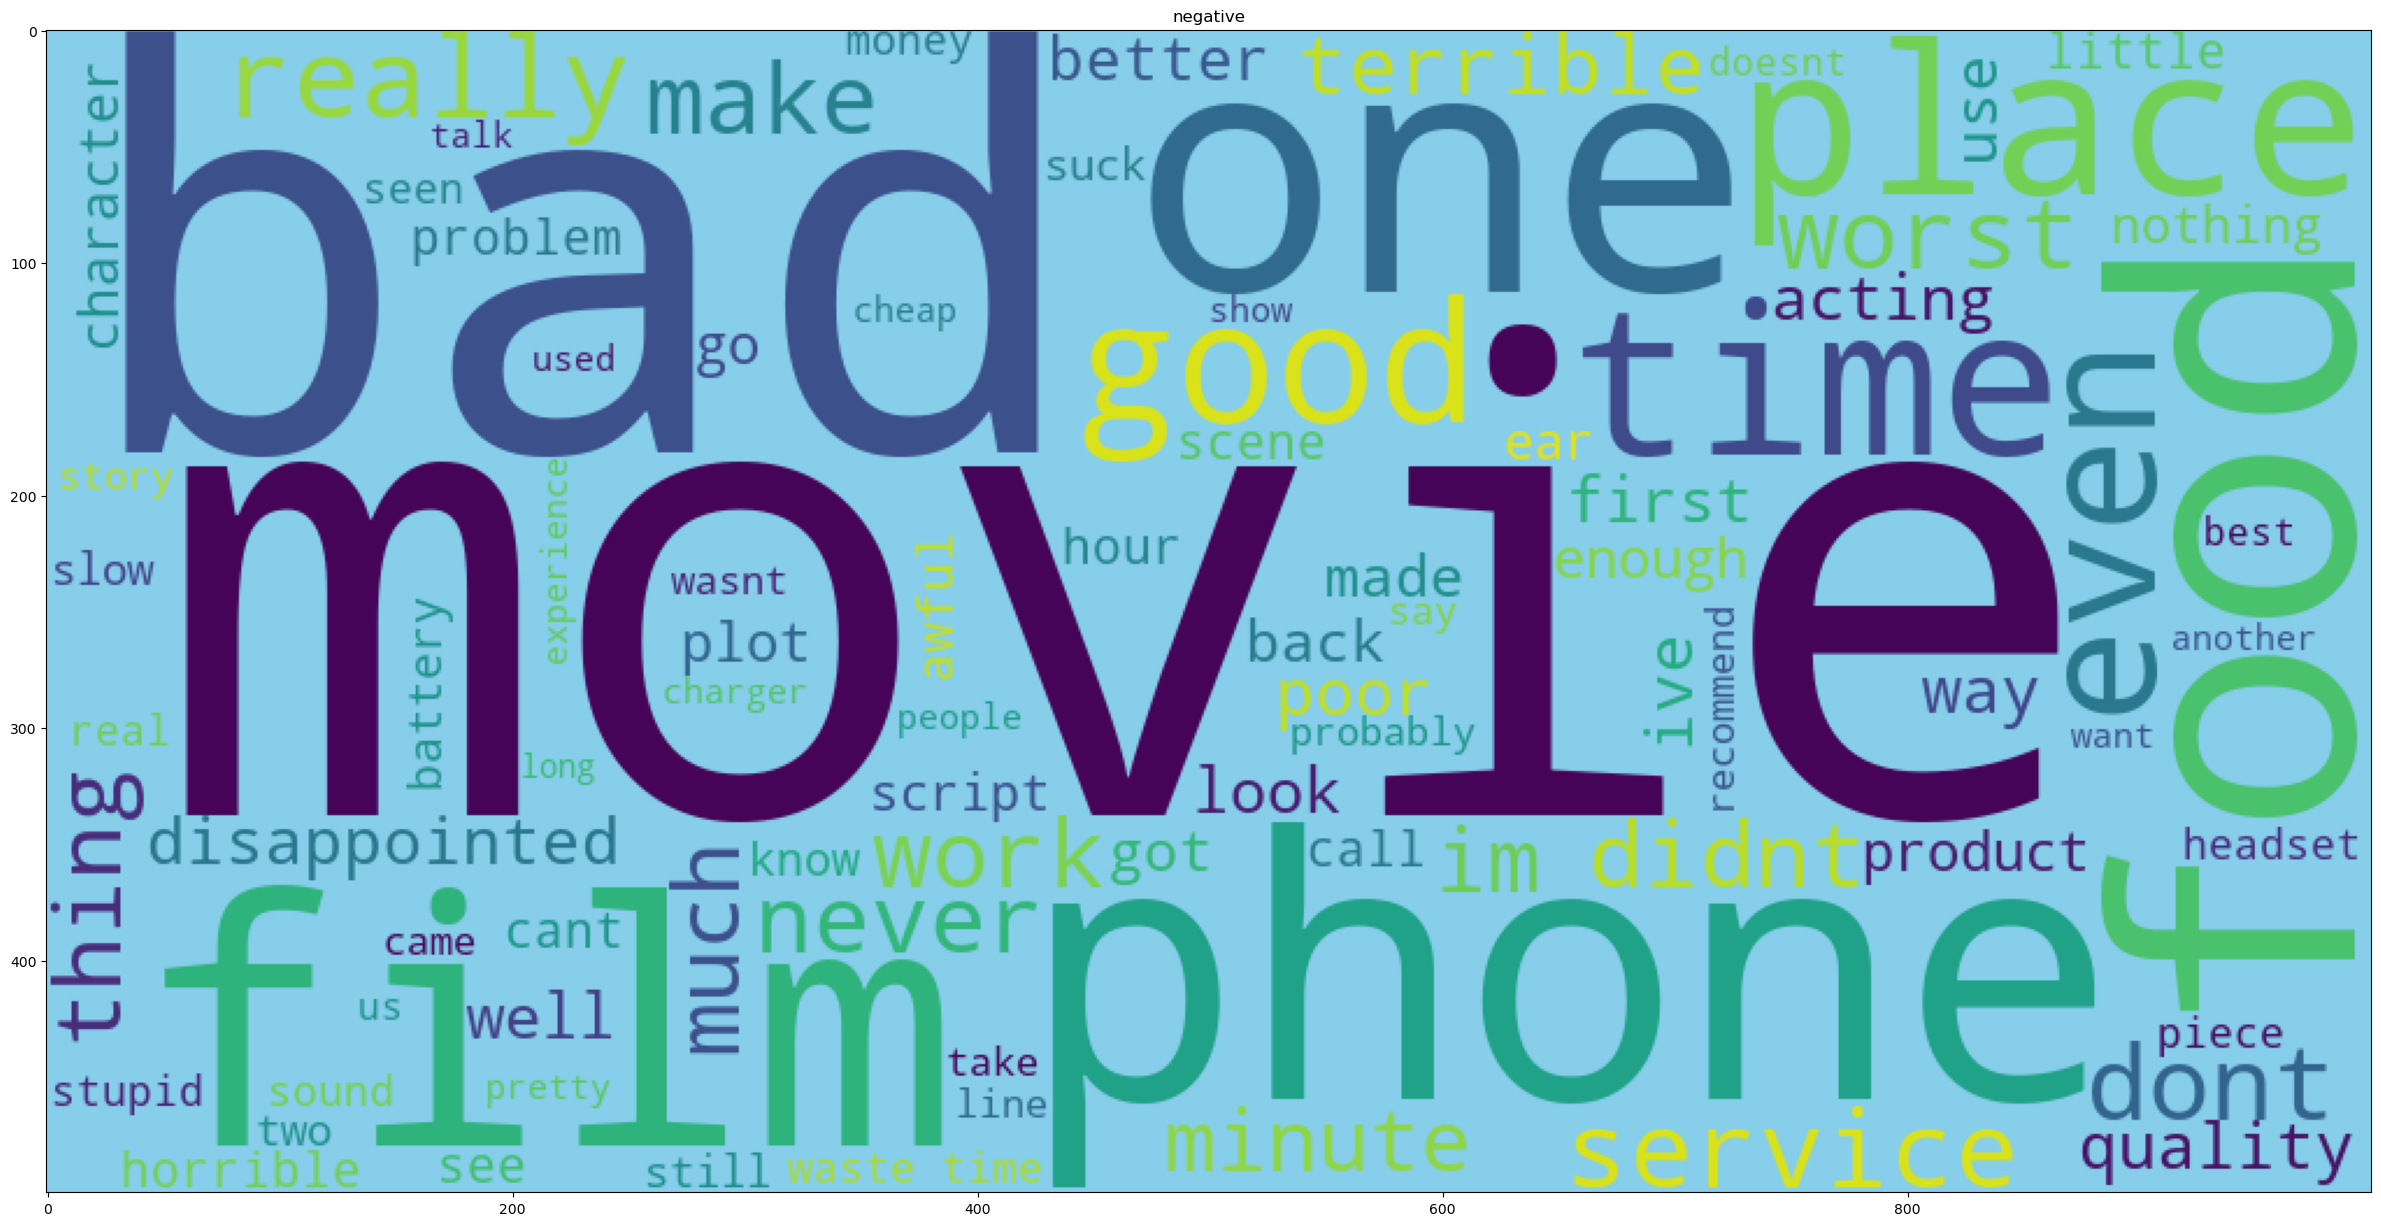

In [121]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

### Model Building

In [122]:
X = review_df['clean_text']
y = review_df['sentiment']

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

In [149]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [150]:
y_pred = model.predict(X_test)

In [152]:
#Showing Classification Report

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       317
           1       0.79      0.87      0.83       283

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.84      0.83      0.83       600



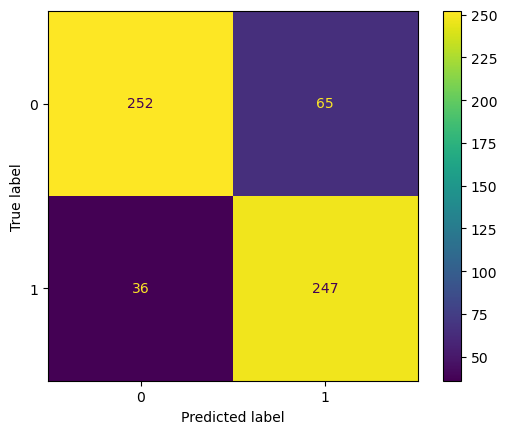

In [154]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()